In [117]:
import matplotlib.pyplot as plt
import h5py
import cv2 as cv
import numpy as np
import json
from matplotlib.pyplot import cm
import networkx as nx
import torch
import sys
sys.path.append('..')
import lib.scene_parser
from lib.scene_parser.rcnn.utils.visualize import select_top_predictions, select_top_pred_predictions, overlay_boxes, overlay_lines, overlay_class_names, generate_graph

In [118]:
class sg_train_line:
    def __init__(self,iter, loss, loss_obj_classifier, loss_relpn, loss_pred_classifier, time, data, lr):
        self.iter = iter
        self.loss = loss
        self.loss_obj_classifier = loss_obj_classifier
        self.loss_relpn = loss_relpn
        self.loss_pred_classifier = loss_pred_classifier
        self.time = time
        self.data = data
        self.lr = lr

In [119]:
'2022-03-11 17:25:47,769 scene_graph_generation.trainer INFO: model: scene_parser  eta: 9 days, 17:33:54  iter: 10000/100000  loss: 1.0721 (1.1608)  loss_classifier: 0.5458 (0.5933)  loss_box_reg: 0.2006 (0.2201) '
' loss_objectness: 0.0590 (0.1384)  loss_rpn_box_reg: 0.1718 (0.2089)  time: 7.2121 (9.3426)  data: 2.4717 (4.8029)  lr: 0.001673  max mem: 8641\n'
class rcnn_train_line:
    def __init__(self,iter, loss, loss_classifier, loss_box_reg, loss_objectness, loss_rpn_box_reg, time, data, lr):
        self.iter = iter
        self.loss = loss
        self.loss_classifier = loss_classifier
        self.loss_box_reg = loss_box_reg
        self.loss_objectness = loss_objectness
        self.loss_rpn_box_reg = loss_rpn_box_reg
        self.time = time
        self.data = data
        self.lr = lr

In [120]:
sg_train =  open('/mnt/f/graph-rcnn/logs/sg_baseline_2022-03-17-07_47_24.txt', "r")
rcnn_train =  open('/mnt/f/graph-rcnn/logs/sg_baseline_2022-03-11-17_24_59.txt', "r")

sg_train = sg_train.readlines()
rcnn_train = rcnn_train.readlines()

In [121]:
sg_train[0]

"2022-03-17 07:47:24,328 scene_graph_generation INFO: Namespace(algorithm='sg_baseline', apply=False, batchsize=0, config_file='configs/sgg_res101_step.yaml', distributed=False, id=0, image='test.jpg', inference=False, instance=-1, local_rank=0, resume=0, session=0, use_freq_prior=False, visualize=False)\n"

In [122]:
rcnn_train[0]

"2022-03-11 17:24:59,109 scene_graph_generation INFO: Namespace(algorithm='sg_baseline', apply=False, batchsize=0, config_file='configs/faster_rcnn_res101.yaml', distributed=False, id=0, image='test.jpg', inference=False, instance=-1, local_rank=0, resume=0, session=0, use_freq_prior=False, visualize=False)\n"

In [123]:
sg_train_tmp = list()
for line in sg_train:
    try:
        iter = int(line.split('iter: ')[1].split('/')[0])
        loss = float(line.split('loss: ')[1][0:6])
        loss_obj_classifier = float(line.split('loss_obj_classifier: ')[1][0:6])
        loss_relpn =  float(line.split('loss_relpn: ')[1][0:6])
        loss_pred_classifier =  float(line.split('loss_pred_classifier: ')[1][0:6])
        time =  float(line.split('time: ')[1][0:6])
        data =  float(line.split('data: ')[1][0:6])
        lr =  float(line.split('lr: ')[1][0:6])

        sg_line = sg_train_line(iter,loss,loss_obj_classifier,loss_relpn,loss_pred_classifier,time,data,lr)
        sg_train_tmp.append(sg_line)
    except Exception as e:
        ex = e
sg_train = sg_train_tmp

In [124]:
rcnn_train_tmp = list()
for line in rcnn_train:
    try:
        iter = int(line.split('iter: ')[1].split('/')[0])
        loss = float(line.split('loss: ')[1][0:6])
        loss_classifier = float(line.split('loss_classifier: ')[1][0:6])
        loss_box_reg =  float(line.split('loss_box_reg: ')[1][0:6])
        loss_objectness =  float(line.split('loss_objectness: ')[1][0:6])
        loss_rpn_box_reg =  float(line.split('loss_rpn_box_reg: ')[1][0:6])
        time =  float(line.split('time: ')[1][0:6])
        data =  float(line.split('data: ')[1][0:6])
        lr =  float(line.split('lr: ')[1][0:6])

        rcnn_line = rcnn_train_line(iter,loss,loss_classifier,loss_box_reg,loss_objectness,loss_rpn_box_reg,time,data,lr)
        rcnn_train_tmp.append(rcnn_line)
    except Exception as e:
        ex = e
rcnn_train = rcnn_train_tmp

# RCNN

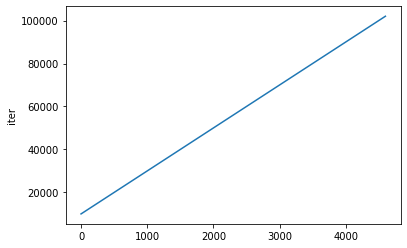

In [125]:
plt.plot([line.iter for line in rcnn_train])
plt.ylabel('iter')
plt.show()

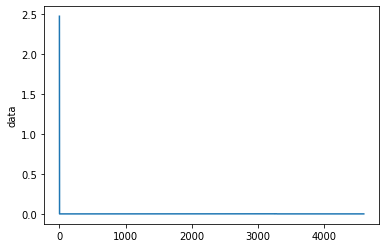

In [126]:
plt.plot([line.data for line in rcnn_train])
plt.ylabel('data')
plt.show()

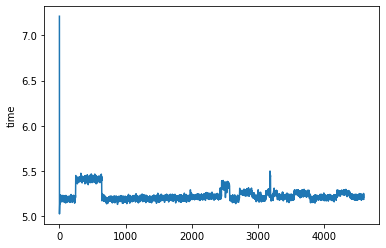

In [127]:
plt.plot([line.time for line in rcnn_train])
plt.ylabel('time')
plt.show()

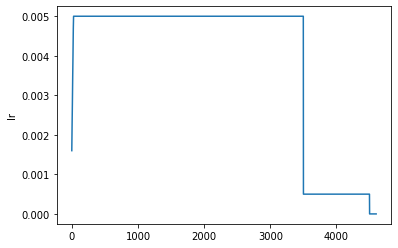

In [128]:
plt.plot([line.lr for line in rcnn_train])
plt.ylabel('lr')
plt.show()

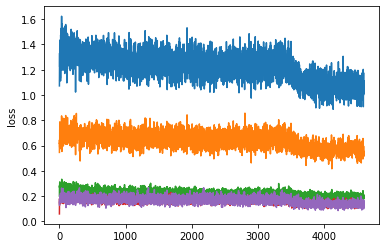

In [129]:
plt.plot([line.loss for line in rcnn_train])
plt.plot([line.loss_classifier for line in rcnn_train])
plt.plot([line.loss_box_reg for line in rcnn_train])
plt.plot([line.loss_objectness for line in rcnn_train])
plt.plot([line.loss_rpn_box_reg for line in rcnn_train])
plt.ylabel('loss')
plt.show()

# SG

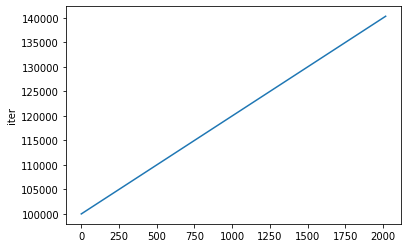

In [130]:
plt.plot([line.iter for line in sg_train])
plt.ylabel('iter')
plt.show()

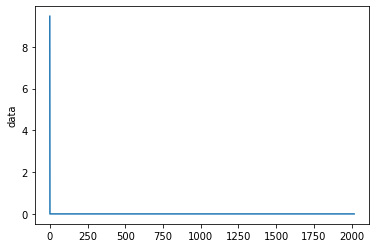

In [131]:
plt.plot([line.data for line in sg_train])
plt.ylabel('data')
plt.show()

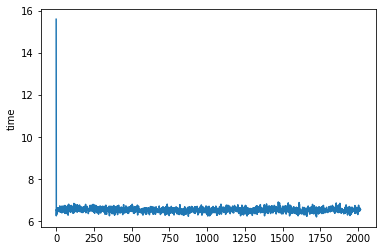

In [132]:
plt.plot([line.time for line in sg_train])
plt.ylabel('time')
plt.show()

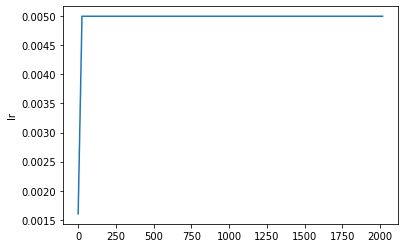

In [133]:
plt.plot([line.lr for line in sg_train])
plt.ylabel('lr')
plt.show()

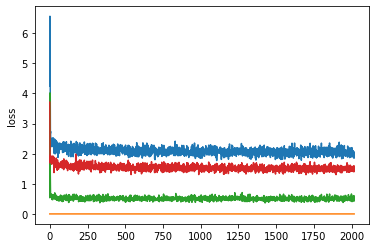

In [135]:
plt.plot([line.loss for line in sg_train])
plt.plot([line.loss_obj_classifier for line in sg_train])
plt.plot([line.loss_relpn for line in sg_train])
plt.plot([line.loss_pred_classifier for line in sg_train])
plt.ylabel('loss')
plt.show()